In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import pandas as pd
import time
import random

from tensorflow.random import set_seed

In [5]:
# Add modules path
module_path = os.path.abspath('../..')
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from src.data_reader import DataReader
from src.feature_engineering import add_time_lags
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves
from src.serialization import load_object
from src.training import train_evaluate_mlp, MLPConfigParams
from src.utils import numbers_list_to_string

In [7]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [8]:
# Set input and output paths
filename = '../data/N-CMAPSS_DS02-006.h5'
output_path = '../results/experiment_set_18_corrected'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [9]:
def preprocess_data(train_set, lags_list, selected_columns, drop_unit_col=False):
    if len(lags_list) == 0:
        return train_set.copy()
    
    train_set_lagged = add_time_lags(train_set, lags_list, selected_columns, 
                                     drop_unit_col=drop_unit_col)
    return train_set_lagged

def train_validation_split(train_set, val_units=[10, 20]):
    unit_col = train_set['unit'].copy(deep=True)
    train_set.drop(['unit'], axis=1, inplace=True)
    
    train_idx = unit_col[~unit_col.isin(val_units)].index
    val_idx = unit_col[unit_col.isin(val_units)].index
    
    train_split = train_set.loc[train_idx]
    val_split = train_set.loc[val_idx]
    
    return train_split, val_split

In [10]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  4.8125
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [11]:
train_set = data_reader.train_set

selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
selected_columns_with_unit = selected_columns + ['unit']
train_set = train_set[selected_columns_with_unit + ['RUL']]

train_set = train_set.astype(np.float32)

Saved object to file: ../results/experiment_set_18_corrected\results_lags_0\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               27904     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 258,177
Trainable params: 258,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
6228/6228 

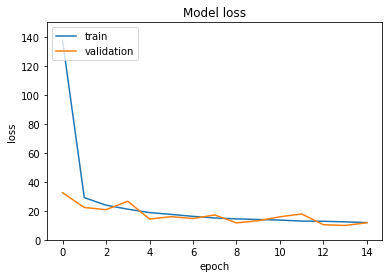

Saved object to file: ../results/experiment_set_18_corrected\results_lags_0\split_0\history_0.pkl
Test set:
MSE: 76.74
RMSE: 8.76
CMAPSS score: 2.05

Saved object to file: ../results/experiment_set_18_corrected\results_lags_0\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               27904     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total p

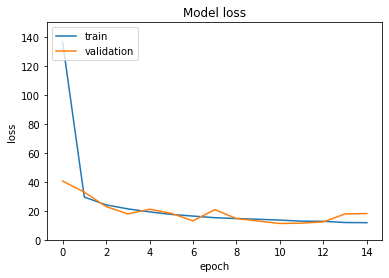

Saved object to file: ../results/experiment_set_18_corrected\results_lags_0\split_1\history_1.pkl
Test set:
MSE: 77.25
RMSE: 8.79
CMAPSS score: 2.07

Saved object to file: ../results/experiment_set_18_corrected\results_lags_0\split_2\scaler.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               27904     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total p

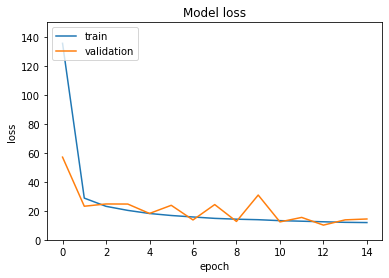

Saved object to file: ../results/experiment_set_18_corrected\results_lags_0\split_2\history_2.pkl
Test set:
MSE: 77.55
RMSE: 8.81
CMAPSS score: 2.04

MSE: mean = 77.18   stddev = 0.33
RMSE: mean = 8.79   stddev = 0.02
CMAPSS: mean = 2.05   stddev = 0.01
Saved object to file: ../results/experiment_set_18_corrected\results_lags_1\split_0\scaler.pkl
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
___________________________________

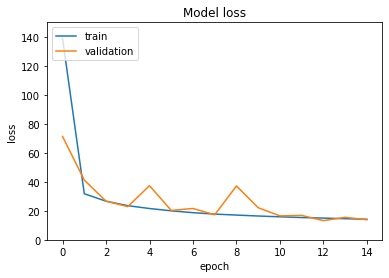

Saved object to file: ../results/experiment_set_18_corrected\results_lags_1\split_0\history_0.pkl
Test set:
MSE: 74.50
RMSE: 8.63
CMAPSS score: 2.04

Saved object to file: ../results/experiment_set_18_corrected\results_lags_1\split_1\scaler.pkl
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total p

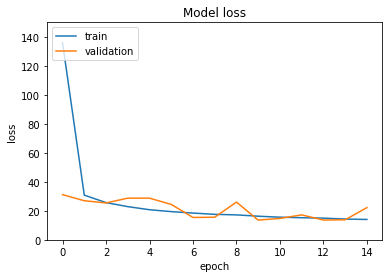

Saved object to file: ../results/experiment_set_18_corrected\results_lags_1\split_1\history_1.pkl
Test set:
MSE: 78.14
RMSE: 8.84
CMAPSS score: 2.05

Saved object to file: ../results/experiment_set_18_corrected\results_lags_1\split_2\scaler.pkl
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total p

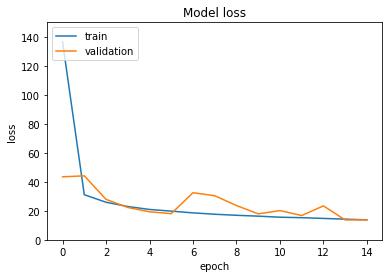

Saved object to file: ../results/experiment_set_18_corrected\results_lags_1\split_2\history_2.pkl
Test set:
MSE: 76.18
RMSE: 8.73
CMAPSS score: 2.02

MSE: mean = 76.27   stddev = 1.49
RMSE: mean = 8.73   stddev = 0.09
CMAPSS: mean = 2.04   stddev = 0.01
Saved object to file: ../results/experiment_set_18_corrected\results_lags_2\split_0\scaler.pkl
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_33 (Dense)             (None, 64)                32832     
___________________________________

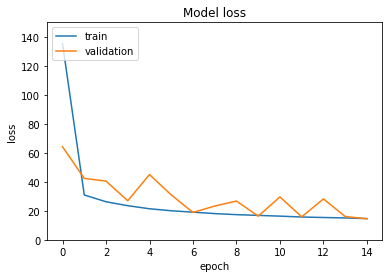

Saved object to file: ../results/experiment_set_18_corrected\results_lags_2\split_0\history_0.pkl
Test set:
MSE: 77.79
RMSE: 8.82
CMAPSS score: 2.05

Saved object to file: ../results/experiment_set_18_corrected\results_lags_2\split_1\scaler.pkl
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_38 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total p

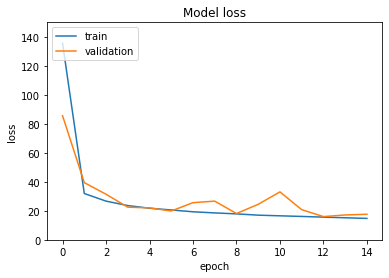

Saved object to file: ../results/experiment_set_18_corrected\results_lags_2\split_1\history_1.pkl
Test set:
MSE: 74.50
RMSE: 8.63
CMAPSS score: 2.04

Saved object to file: ../results/experiment_set_18_corrected\results_lags_2\split_2\scaler.pkl
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_43 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total p

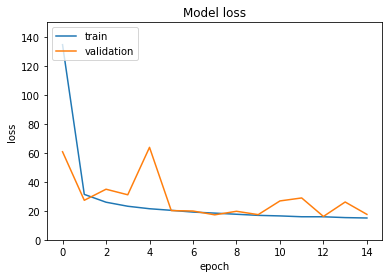

Saved object to file: ../results/experiment_set_18_corrected\results_lags_2\split_2\history_2.pkl
Test set:
MSE: 77.36
RMSE: 8.80
CMAPSS score: 2.05

MSE: mean = 76.55   stddev = 1.46
RMSE: mean = 8.75   stddev = 0.08
CMAPSS: mean = 2.05   stddev = 0.00
Saved object to file: ../results/experiment_set_18_corrected\results_lags_3\split_0\scaler.pkl
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_48 (Dense)             (None, 64)                32832     
___________________________________

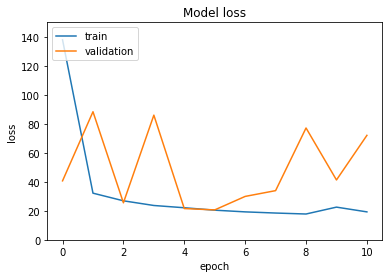

Saved object to file: ../results/experiment_set_18_corrected\results_lags_3\split_0\history_0.pkl
Test set:
MSE: 74.97
RMSE: 8.66
CMAPSS score: 2.04

Saved object to file: ../results/experiment_set_18_corrected\results_lags_3\split_1\scaler.pkl
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_52 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_53 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total 

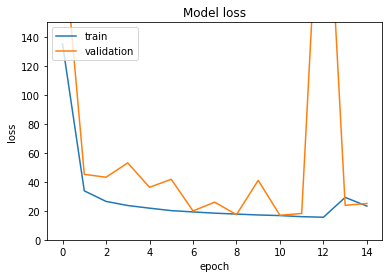

Saved object to file: ../results/experiment_set_18_corrected\results_lags_3\split_1\history_1.pkl
Test set:
MSE: 75.34
RMSE: 8.68
CMAPSS score: 2.04

Saved object to file: ../results/experiment_set_18_corrected\results_lags_3\split_2\scaler.pkl
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_57 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_58 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total 

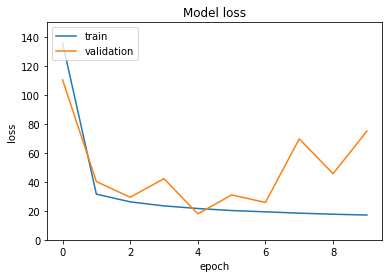

Saved object to file: ../results/experiment_set_18_corrected\results_lags_3\split_2\history_2.pkl
Test set:
MSE: 73.38
RMSE: 8.57
CMAPSS score: 2.01

MSE: mean = 74.56   stddev = 0.85
RMSE: mean = 8.63   stddev = 0.05
CMAPSS: mean = 2.03   stddev = 0.01
Saved object to file: ../results/experiment_set_18_corrected\results_lags_4\split_0\scaler.pkl
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_61 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_62 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_63 (Dense)             (None, 64)                32832     
__________________________________

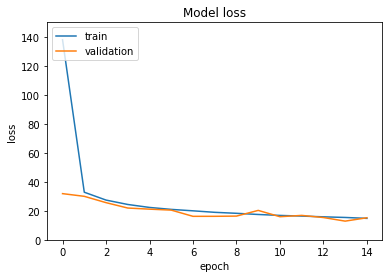

Saved object to file: ../results/experiment_set_18_corrected\results_lags_4\split_0\history_0.pkl
Test set:
MSE: 74.33
RMSE: 8.62
CMAPSS score: 2.04

Saved object to file: ../results/experiment_set_18_corrected\results_lags_4\split_1\scaler.pkl
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_66 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_67 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_68 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total 

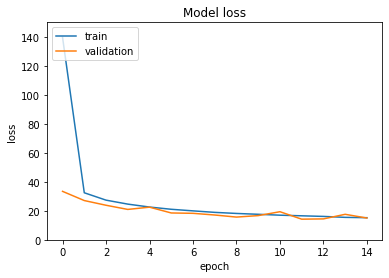

Saved object to file: ../results/experiment_set_18_corrected\results_lags_4\split_1\history_1.pkl
Test set:
MSE: 78.52
RMSE: 8.86
CMAPSS score: 2.06

Saved object to file: ../results/experiment_set_18_corrected\results_lags_4\split_2\scaler.pkl
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 256)               23296     
_________________________________________________________________
dense_71 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_72 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_73 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 65        
Total 

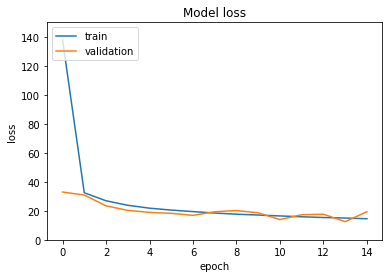

Saved object to file: ../results/experiment_set_18_corrected\results_lags_4\split_2\history_2.pkl
Test set:
MSE: 76.27
RMSE: 8.73
CMAPSS score: 2.07

MSE: mean = 76.37   stddev = 1.71
RMSE: mean = 8.74   stddev = 0.10
CMAPSS: mean = 2.06   stddev = 0.01


In [12]:
##################################################
# Effect of time lags (experiment set 18 corrected)
##################################################
NUM_TRIALS = 3
EPOCHS = 15
BATCH_SIZE = 512

mlp_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)
lags_lists = [[1, 2, 3, 4, 5], [1, 5, 10, 15], [5, 10, 15, 20], [10, 15, 20, 25], 
              [10, 20, 30, 40]]

results_file = os.path.join(output_path, "results_time_lags.csv")
with open(results_file, "w") as file:
    file.write("time_lags,mse,rmse,cmapss,mse(mean),mse(std),rmse(mean),rmse(std),cmapss(mean),cmapss(std)\n")

for idx, lags in enumerate(lags_lists):
    results_folder = f"results_lags_{idx}"
    results_path = os.path.join(output_path, results_folder)
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    
    with open(results_file, "a") as file:
        file.write(f"{numbers_list_to_string(lags)},")
    
    # Add time lags
    train_set_lagged = preprocess_data(train_set, lags, selected_columns, drop_unit_col=False) 
    
    # Validation split after engine number
    train_split, val_split = train_validation_split(train_set_lagged)
    
    x_train_split = train_split[[i for i in list(train_split.columns) if i != 'RUL']]
    x_holdout_split = val_split[[i for i in list(val_split.columns) if i != 'RUL']]
    
    y_train_split = train_split['RUL']
    y_holdout_split = val_split['RUL']
    
    mse_vals, rmse_vals, cmapss_vals = train_evaluate_mlp(
        x_train_split, y_train_split, 
        x_holdout_split, y_holdout_split,
        NUM_TRIALS, 
        mlp_params, 
        results_path, 
        EPOCHS, BATCH_SIZE,
        results_file=results_file)

In [11]:
# Train on whole set
train_set = data_reader.train_set
test_set = data_reader.test_set

selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
selected_columns_with_unit = selected_columns + ['unit']

train_set = train_set[selected_columns_with_unit + ['RUL']]
test_set = test_set[selected_columns_with_unit + ['RUL']]

train_set = train_set.astype(np.float32)
test_set = test_set.astype(np.float32)

Saved object to file: ../results/experiment_set_18_1\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               27904     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 258,177
Trainable params: 258,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
9246/9253 [======================

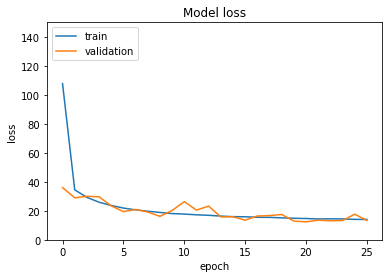

Saved object to file: ../results/experiment_set_18_1\split_0\history_0.pkl
Test set:
MSE: 66.35
RMSE: 8.15
CMAPSS score: 1.82

Saved object to file: ../results/experiment_set_18_1\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               27904     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 258,177
Trainable params: 258,177
Non-t

Epoch 28/60
9249/9253 [============================>.] - ETA: 0s - loss: 13.5243
Epoch 00028: val_loss did not improve from 12.14002
9253/9253 [==============================] - 38s 4ms/step - loss: 13.5245 - val_loss: 14.9953
Epoch 29/60
9241/9253 [============================>.] - ETA: 0s - loss: 13.4632
Epoch 00029: val_loss did not improve from 12.14002
9253/9253 [==============================] - 39s 4ms/step - loss: 13.4687 - val_loss: 17.8726
Epoch 30/60
9247/9253 [============================>.] - ETA: 0s - loss: 13.3018
Epoch 00030: val_loss did not improve from 12.14002
9253/9253 [==============================] - 39s 4ms/step - loss: 13.3018 - val_loss: 14.8948
Epoch 00030: early stopping


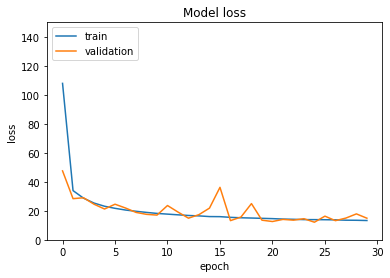

Saved object to file: ../results/experiment_set_18_1\split_1\history_1.pkl
Test set:
MSE: 69.05
RMSE: 8.31
CMAPSS score: 1.84

Saved object to file: ../results/experiment_set_18_1\split_2\scaler.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               27904     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 258,177
Trainable params: 258,177
Non-t

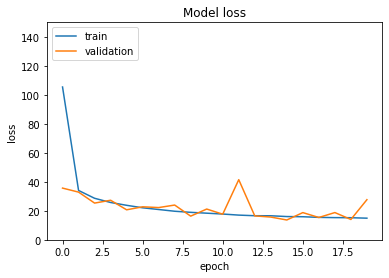

Saved object to file: ../results/experiment_set_18_1\split_2\history_2.pkl
Test set:
MSE: 64.48
RMSE: 8.03
CMAPSS score: 1.80

MSE: mean = 66.63   stddev = 1.88
RMSE: mean = 8.16   stddev = 0.11
CMAPSS: mean = 1.82   stddev = 0.01


In [15]:
###########################################
# Effect of time lags (experiment set 18_1)
###########################################
NUM_TRIALS = 3
EPOCHS = 60
BATCH_SIZE = 512

mlp_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0.0)
lags = [1, 2, 3, 4, 5]

results_file = os.path.join(output_path, "results_time_lags.csv")
with open(results_file, "w") as file:
    file.write("time_lags,mse,rmse,cmapss,mse(mean),mse(std),rmse(mean),rmse(std),cmapss(mean),cmapss(std)\n")

results_path = output_path
    
with open(results_file, "a") as file:
    file.write(f"{numbers_list_to_string(lags)},")
    
# Add time lags
x_train, y_train = preprocess_data(train_set, lags, selected_columns) 
x_test, y_test = preprocess_data(test_set, lags, selected_columns) 
      
mse_vals, rmse_vals, cmapss_vals = train_evaluate_mlp(
    x_train, y_train, 
    x_test, y_test,
    NUM_TRIALS, 
    mlp_params, 
    results_path, 
    EPOCHS, BATCH_SIZE,
    results_file=results_file)